In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

df = pd.read_csv('weight-height male-female - weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Goal
Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

In [4]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

#define a variable for our data
data = females['Height']
data.head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

### Plot the probability distribution and visualize the range we are interested in.


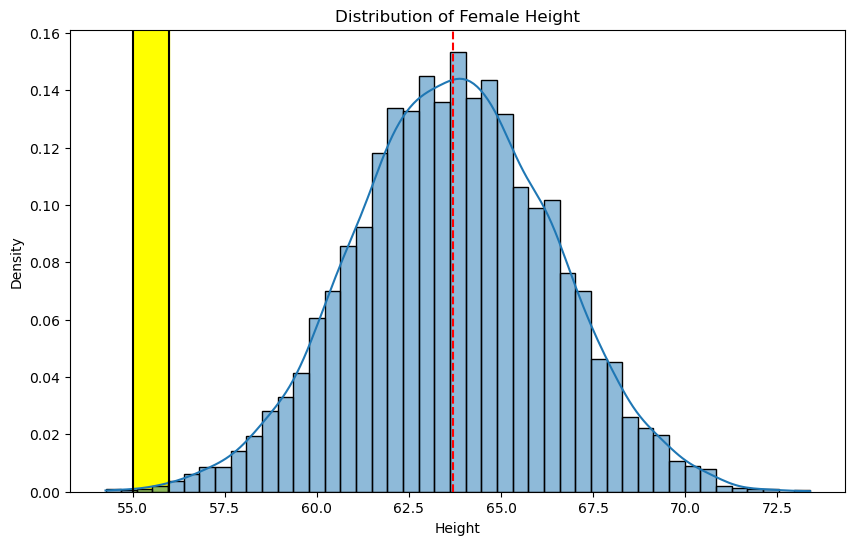

In [5]:
#define range
low_end = 55.0
high_end = 56.0

#To find the area under the curve would take a bit of calculus, 
#but we have a less math-intensive strategy using the cumulative probability distribution
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

## Plot the probability distribution with a KDE line and annotate the mean.
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvline(mean,color='r',ls='--')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

## Making the normal pdf and cdf

While the height data is pretty close to being normal, before we can do our calculations, we will create the pdf and cdf for the normal curve that has the same mean and standard deviation as our data.
When using creating the pdf function/curve for any normal distribution, we will use stats.norm.pdf. It accepts the following parameters:

- x: range and spacing of x 
- loc: the mean (defaults to 0)
- scale: the standard deviation. (default =1 )

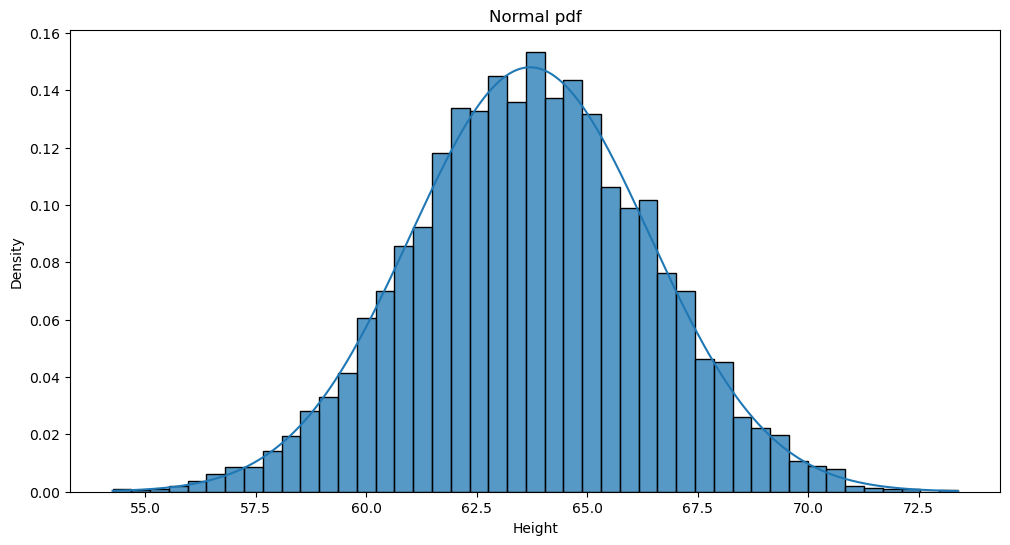

In [7]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

## 1. between 55.0 and 56.0 inches

In [6]:
#Now that we have explored the concept visually, we just need to do a little subtraction 
#to get the area of our range.
## we subtract to find the probability of a value occurring in the range
stats.norm.pdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.0018638562382696142

## 2. is less than 5 feet (60 in)

In [8]:
#If we wanted to calculate the probability of the height 65 inches or greater, 
#we subtract from 1.
stats.norm.cdf(60, loc=mean,scale=std)

0.08446492725207488

## 3. is greater than the mean (hint: do you know this answer intuitively?)